# **Image to Pencil Sketch with Python**

**Author-Samrat Mukherjee**

In [1]:
#import libraries
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import imageio
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Image

In [4]:
cat=imageio.imread('/content/drive/MyDrive/cat.jpg')

<ipython-input-4-2d860193a58a>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cat=imageio.imread('/content/drive/MyDrive/cat.jpg')


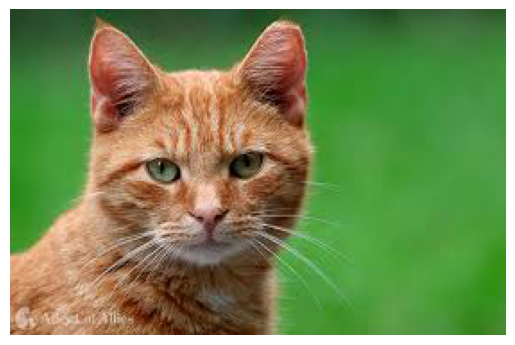

In [5]:
plt.imshow(cat)
plt.axis('off')  # Remove the axes
plt.show()

# **Coverting the Image to Pencil Sketch**

In [6]:
def convert_to_pencil_sketch(image):
    # Convert the image to grayscale
    gray_img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    # Invert the grayscale image
    invert_image = cv2.bitwise_not(gray_img)

    # Apply Gaussian blur to the inverted image
    blur_img = cv2.GaussianBlur(invert_image,(111,111),0)

    # Blend the grayscale image with the inverted blurred image to create the pencil sketch
    invblur_img=cv2.bitwise_not(blur_img)

    # Adjust the intensity of the pencil sketch
    pencil_sketch = cv2.divide(gray_img, invblur_img, scale=256.0)

    return pencil_sketch

# **Pencil Sketch Image**

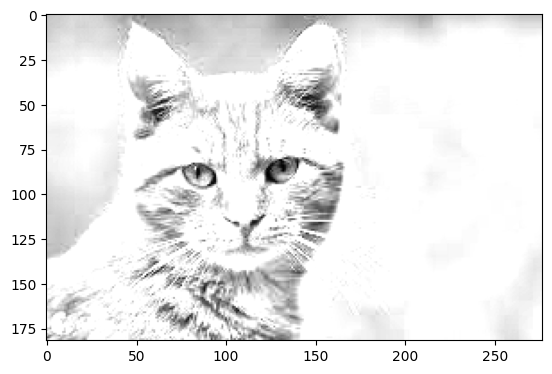

In [7]:
# Convert the image to pencil sketch
pencil_sketch = convert_to_pencil_sketch(cat)

plt.imshow(pencil_sketch, cmap='gray')